# Data Science & Business Analytics

### Author : PRAMOD GOUDA

## Task - 2 : Simple Linear Regression task
**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

### Importing Libraries

**Libraries used: Pandas, Numpy, Matplotlib, Seaborn**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Reading data from remote link

In [2]:
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### Examining the various aspects of our data

In [3]:
ds.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
ds.describe()   #Basics statistics of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
ds.shape

(25, 2)

In [6]:
ds.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
ds.isna().sum()
#Counting the number the NaN values in a column in pandas DataFrame.

Hours     0
Scores    0
dtype: int64

In [9]:
ds.isnull().values.any()
#Checking if any null values are present in pandas DataFrame.

False

In [10]:
ds.corr()
# Correlation coefficients quantify the association between variables or features of a dataset.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Plotting Graphs for Data Visualization

Let's plot our data points on 2-D graph to visualize the data and find any relationship between the data. We can create the plot with the following script:

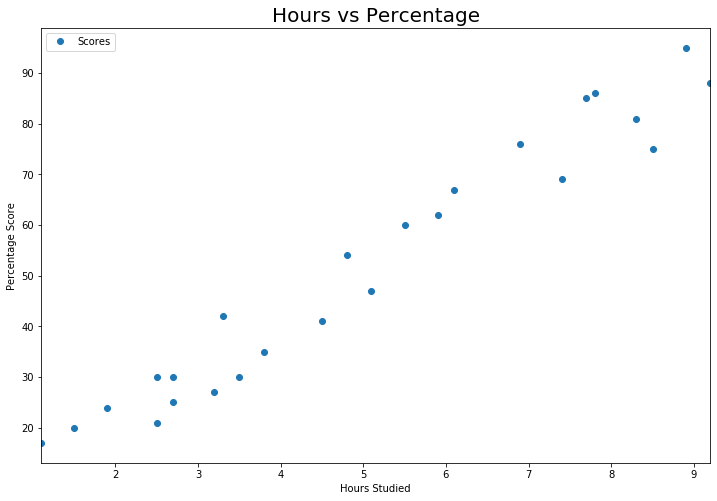

In [11]:
# Plotting the distribution of scores
ds.plot(x='Hours', y='Scores' , style='o',figsize=(12,8))
# style refers to the type of marker you want to use : s-square, o-circle, *-star , etc.
plt.title('Hours vs Percentage', fontsize=20)  
plt.xlabel('Hours Studied', fontsize=10)  
plt.ylabel('Percentage Score', fontsize=10)  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

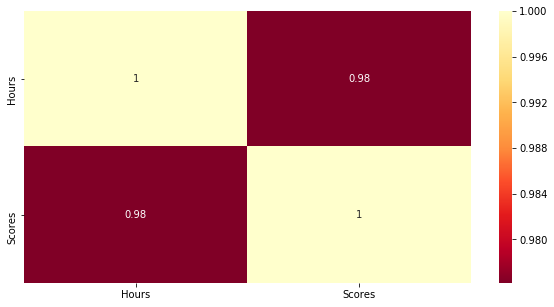

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.corr(),annot=True,cmap="YlOrRd_r",annot_kws={'fontsize':10})
#Plot rectangular data as a color-encoded matrix.
#This is an Axes-level function and will draw the heatmap into the currently-active Axes.

### **Preparing the data  for Modelling**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [13]:
x = ds.iloc[:, :-1].values
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [14]:
y = ds.iloc[:, 1].values 
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [16]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


**For Linear Regression Y = mX + c ; Here 'm' is Cofficient & 'c' - Intercept**

In [17]:
print ("Coefficient : ",regressor.coef_)
print ("Intercept   : ",regressor.intercept_)

Coefficient :  [9.91065648]
Intercept   :  2.018160041434683


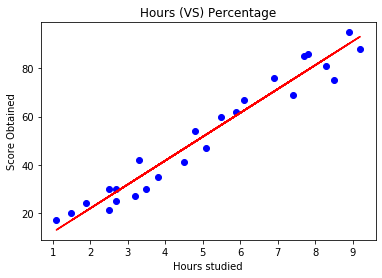

In [18]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x,y,c='b')
plt.plot(x,line,c='r')
plt.title("Hours (VS) Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score Obtained")
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [19]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual vs Predicted Values

In [20]:
df=pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference(%)': abs((y_pred-y_test)/y_test*100) })
df

,Actual,Predicted,Difference(%)
0,20,16.884145,15.579276
1,27,33.732261,24.934299
2,69,75.357018,9.213070
3,30,26.794801,10.683996
4,62,60.491033,2.433817


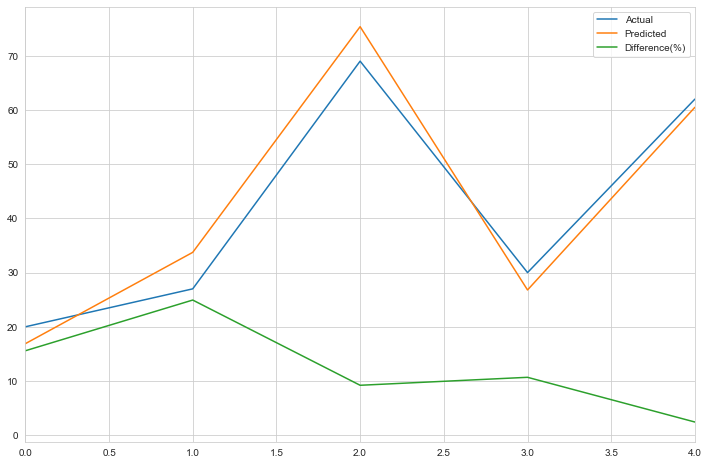

In [21]:
sns.set_style('whitegrid')
df.plot(kind='line',figsize=(12,8))

#### You can also test with your own data

In [22]:
hours = [[7.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[7.25]]
Predicted Score = 73.8704195260909


The student obtained 73.8704195260909 percentage by studying 7.25 hours

#### Score of the Student if he studied for 9.25 hours

In [23]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


The student obtained 93.69173248737538 percentage by studying 9.25 hours

### **Evaluating the model**

The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
r_score=r2_score(y_pred,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-Squared: 0.9546785947197246


**The model has an accuracy of 95.47%**

### Conclusion: 

#### Upon the evaluation of the model for its perormance, we can conclude that algorithm for the model has proven to work good for the given dataset. The student score was predicted to 93.69 % when the student studied for 9.25 hours.